# Uncertainty Estimates from Classifiers

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

There are two different functions in scikit-learn that can be used to obtain uncertainty estimates from classifiers:
- decision_function
- predict_proba

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from helpers.plot_helpers import discrete_scatter

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

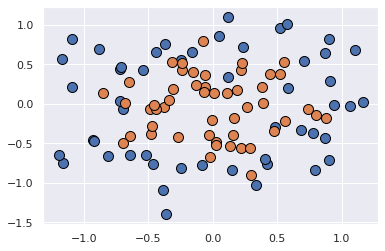

In [3]:
discrete_scatter(X[:, 0], X[:, 1], y, markers='o')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

# we rename the classes "blue" and "red" for illustration purposes
y_named = np.array(["blue", "red"])[y]

# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

## The Decision Function

In [5]:
print(f"X_test.shape: {X_test.shape}")
print(f"Decision function shape: {gbrt.decision_function(X_test).shape}")

X_test.shape: (25, 2)
Decision function shape: (25,)


In [6]:
# show the first few entries of decision_function
gbrt.decision_function(X_test)[:6]

array([ 4.13592603, -1.70169917, -3.95106099, -3.62609552,  4.28986642,
        3.66166081])

In [7]:
gbrt.decision_function(X_test) > 0

array([ True, False, False, False,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True, False, False, False,
        True,  True,  True,  True,  True, False, False])

In [8]:
gbrt.predict(X_test)

array(['red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red',
       'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue',
       'red', 'red', 'red', 'red', 'red', 'blue', 'blue'], dtype='<U4')

In [9]:
gbrt.classes_

array(['blue', 'red'], dtype='<U4')

For binary classification:
- the negative class is always the first entry of the classes_ attribute
- the positive class is the second entry of classes_

In [19]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)

# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]

# pred is the same as the output of gbrt.predict
print(f"pred is equal to predictions: {np.all(pred == gbrt.predict(X_test))}")

pred is equal to predictions: True


In [20]:
decision_function = gbrt.decision_function(X_test)

print(f"Decision function minimum: {np.min(decision_function):.2f} maximum: {np.max(decision_function):.2f}")

Decision function minimum: -7.69 maximum: 4.29


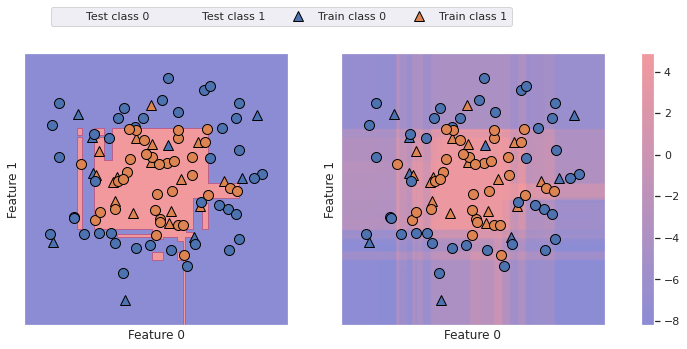

In [21]:
from helpers import tools
from helpers import plot_helpers

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=plot_helpers.cm2)

scores_image = tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=plot_helpers.ReBl)


for ax in axes:
    # plot training and test points
    discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
plt.rcParams['axes.grid'] = False
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))
plt.show()

## Predicting Probabilities

In [22]:
gbrt.predict_proba(X_test).shape

(25, 2)

In [23]:
# gbrt.predict_proba(X_test[:6])
gbrt.predict_proba(X_test[:6])

array([[0.01573626, 0.98426374],
       [0.84575653, 0.15424347],
       [0.98112869, 0.01887131],
       [0.97407033, 0.02592967],
       [0.01352142, 0.98647858],
       [0.02504637, 0.97495363]])

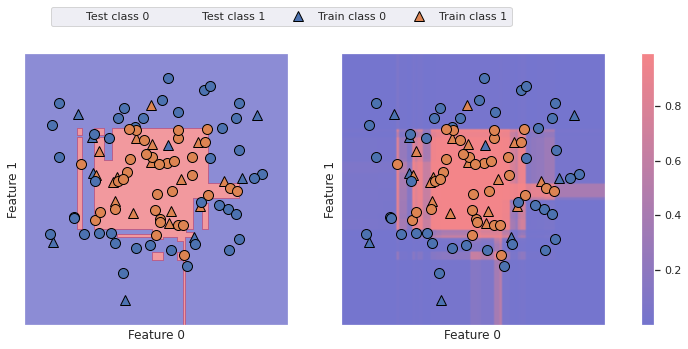

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5)) 

tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=plot_helpers.cm2)
scores_image = tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=plot_helpers.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

plt.rcParams['axes.grid'] = False
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))
plt.show()

## Uncertainty in Multiclass Classification

In [26]:
from sklearn.datasets import load_iris

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [27]:
gbrt.decision_function(X_test).shape

(38, 3)

In [28]:
gbrt.decision_function(X_test)[:6, :]

array([[-1.995715  ,  0.04758267, -1.92720695],
       [ 0.06146394, -1.90755736, -1.92793758],
       [-1.99058203, -1.87637861,  0.09686725],
       [-1.995715  ,  0.04758267, -1.92720695],
       [-1.99730159, -0.13469108, -1.20341483],
       [ 0.06146394, -1.90755736, -1.92793758]])

In [29]:
np.argmax(gbrt.decision_function(X_test), axis=1)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [30]:
gbrt.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [31]:
#show the first few entries of predict_proba
print(f"Predicted probabilities:\n{gbrt.predict_proba(X_test)[:6]}")
# show that sums across rows are one
print(f"Sums: {gbrt.predict_proba(X_test)[:6].sum(axis=1)}")

Predicted probabilities:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Sums: [1. 1. 1. 1. 1. 1.]


In [32]:
np.argmax(gbrt.predict_proba(X_test), axis=1)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [33]:
gbrt.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [34]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

# represent each target by its class name in the iris dataset
named_target = iris.target_names[y_train]

logreg.fit(X_train, named_target)

print(f"unique classes in training data: {logreg.classes_}")
print(f"predictions: {logreg.predict(X_test)[:10]}")

argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print(f"argmax of decision function: {argmax_dec_func[:10]}")
print(f"argmax combined with classes_: {logreg.classes_[argmax_dec_func][:10]}")

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
